## Training a Neural Network

## Installs:

In [ ]:
# % pip install torch
# % pip install sklearning
# % pip install torchsummary

## Imports:

In [ ]:
# Pytorch
import torch
from torch import nn # Neural Networks
from torch.utils.data import Dataset # Splitting training data and ted data
from torch.utils.data import DataLoader # Loading data train and data test
import torch.nn.init # Weight initialization
from torch import optim # Optimizer

# Pandas
import pandas as pd

# Numpy
import numpy as np

# Matplotlib
import matplotlib.pyplot as plt

## Configs:

In [ ]:
# Pandas
pd.set_option('display.max_columns', None)

# Parameters and hyperparameters

In [ ]:
args = {
    'device': '',
    'batch_size': 256,
    'num_workers': 2,
    'lr': 1e-5,
    'weigth_decay': 5e-4,
    'num_epochs': 5000
}

## Checking the device

In [ ]:
if torch.cuda.is_available():
    args['device'] = 'cuda'
else:
    args['device'] = 'cpu'

args['device']

'cpu'

## Loading dataset

In [ ]:
# Downloading dataset
#! wget https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip

In [ ]:
! ls

Bike-Sharing-Dataset.zip  bike_validation.csv  hour.csv    sample_data
bike_train.csv		  day.csv	       Readme.txt


In [ ]:
#! unzip Bike-Sharing-Dataset.zip

In [ ]:
df = pd.read_csv('hour.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
# Data size
df.shape

(17379, 17)

In [ ]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
# Data describe
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Processing the data

In [ ]:
# Removing columns that are not relevant to our training model
df = df.drop(columns= ['instant', 'dteday', 'casual', 'registered'])

## One Hot

In [ ]:
# Defining categorical variations
categorical_columns = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

# Empty list to store the resulting DataFrames after applying one-hot encoding.
one_hot_dfs = []

# Apply one-hot encoding with get_dummies
for col in categorical_columns:
    one_hot_df = pd.get_dummies(df[col], prefix = col).astype(int)
    one_hot_dfs.append(one_hot_df)

# Concatenate the one-hot representations with the other columns of the DataFrame
one_hot_df = pd.concat([df.drop(columns=categorical_columns)] + one_hot_dfs, axis = 1)

In [ ]:
one_hot_df.head()

,temp,atemp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,yr_0,yr_1,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,hr_0,hr_1,hr_2,hr_3,hr_4,hr_5,hr_6,hr_7,hr_8,hr_9,hr_10,hr_11,hr_12,hr_13,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,holiday_0,holiday_1,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,0.24,0.2879,0.81,0.0,16,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0
1,0.22,0.2727,0.80,0.0,40,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0
2,0.22,0.2727,0.80,0.0,32,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0
3,0.24,0.2879,0.75,0.0,13,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0
4,0.24,0.2879,0.75,0.0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0


In [ ]:
one_hot_df.shape

(17379, 62)

In [ ]:
one_hot_df.insert(62, 'label', one_hot_df['cnt'])
one_hot_df = one_hot_df.drop(columns=['cnt'])
one_hot_df.head()

,temp,atemp,hum,windspeed,season_1,season_2,season_3,season_4,yr_0,yr_1,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,hr_0,hr_1,hr_2,hr_3,hr_4,hr_5,hr_6,hr_7,hr_8,hr_9,hr_10,hr_11,hr_12,hr_13,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,holiday_0,holiday_1,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,weathersit_4,label
0,0.24,0.2879,0.81,0.0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,16
1,0.22,0.2727,0.80,0.0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,40
2,0.22,0.2727,0.80,0.0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,32
3,0.24,0.2879,0.75,0.0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,13
4,0.24,0.2879,0.75,0.0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1


In [ ]:
one_hot_df.shape

(17379, 62)

In [ ]:
data = one_hot_df

## Normalizing numerical variables

In [ ]:
# Numeric columns to normalize
normalize_cols = ['temp', 'atemp', 'hum', 'windspeed']

# Storing the normalization data
col_scaler_store = {}

# Normalizing data
for col in normalize_cols:
    mean, std = data[col].mean(), data[col].std()
    col_scaler_store[col] = [mean, std]
    data.loc[:, col] = (data[col] - mean) / std

data.head()

,temp,atemp,hum,windspeed,season_1,season_2,season_3,season_4,yr_0,yr_1,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,hr_0,hr_1,hr_2,hr_3,hr_4,hr_5,hr_6,hr_7,hr_8,hr_9,hr_10,hr_11,hr_12,hr_13,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,holiday_0,holiday_1,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,weathersit_4,label
0,-1.334609,-1.093249,0.947345,-1.553844,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,16
1,-1.438475,-1.181698,0.895513,-1.553844,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,40
2,-1.438475,-1.181698,0.895513,-1.553844,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,32
3,-1.334609,-1.093249,0.636351,-1.553844,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,13
4,-1.334609,-1.093249,0.636351,-1.553844,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1


In [ ]:
col_scaler_store


{'temp': [0.4969871684216583, 0.1925561212497219],
 'atemp': [0.4757751021347604, 0.17185021563535943],
 'hum': [0.6272288394038783, 0.19292983406291508],
 'windspeed': [0.1900976063064618, 0.12234022857279049]}

## Separating training data and test data

In [ ]:
# Defining seed
torch.manual_seed(1)

# Index Pytorch
index = torch.randperm(len(data)).tolist()

# Train size
train_size = int(0.8 * len(data))

df_train = data.iloc[index[: train_size]]
df_validation = data.iloc[index[train_size:]]

In [ ]:
# Train size
df_train.shape

(13903, 62)

In [ ]:
# Test size
df_validation.shape

(3476, 62)

## Saving Dataframe training and test

In [ ]:
df_train.to_csv('bike_train.csv', index = False)
df_validation.to_csv('bike_validation.csv', index = False)
! ls

Bike-Sharing-Dataset.zip  bike_validation.csv  hour.csv    sample_data
bike_train.csv		  day.csv	       Readme.txt


## Class Dataset

In [ ]:
class DatasetBike(Dataset):
    def __init__(self, csv_path, scaler_feat = None, scaler_label = None):

        # Read csv file
        self.data = pd.read_csv(csv_path).to_numpy()

    def __getitem__(self, idx):

        # Separating samples
        sample = self.data[idx][:61]
        label = self.data[idx][-1:]

        # Transforming in tensors
        sample = torch.from_numpy(sample.astype(np.float32))
        label = torch.from_numpy(label.astype(np.int64))

        return sample, label

    def __len__(self):
        return len(self.data)


In [ ]:
train_set = DatasetBike('bike_train.csv')
validation_set = DatasetBike('bike_validation.csv')

In [ ]:
data, label = train_set[0]
data, label


(tensor([-0.6075, -0.4764, -1.8516,  1.3741,  0.0000,  0.0000,  0.0000,  1.0000,
          0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,
          1.0000,  1.0000,  0.0000,  0.0000,  0.0000]),
 tensor([373]))

## DataLoader

In [ ]:
# Defining train loader
train_loader = DataLoader(
    dataset = train_set,
    batch_size = args['batch_size'],
    shuffle = True,
    num_workers = args['num_workers']
)

In [ ]:
# Defining test loader

validation_loader = DataLoader(
    dataset = validation_set,
    batch_size = args['batch_size'],
    shuffle = True,
    num_workers = args['num_workers']
)

In [ ]:
# Visualizing train_loader data
for batch in train_loader:
    data, label = batch
    print(data.size(), label.size())
    break

torch.Size([256, 61]) torch.Size([256, 1])


## Creating neural network

In [ ]:
## Assembling network model
class NetWork(nn.Module):

    # Initialization function
    def __init__(self, input_size, out_size, dropout_prob = 0.5):

        # __init__()
        super(NetWork, self).__init__()

        # Defining neural network layers
        self.layer_set = nn.Sequential(

            # Input Layer + Hidden Layer_0
            nn.Linear(input_size, 128),
            nn.ReLU(),
            #nn.Dropout(dropout_prob),

            # Hidden Layer_1
            nn.Linear(128, 64),
            nn.ReLU(),
            #nn.Dropout(dropout_prob)

            # Hidden Layer_2
            nn.Linear(64, 32),
            nn.ReLU()
            #nn.Dropout(dropout_prob)
        )
        # He initialization for the linear layers
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.kaiming_uniform_(m.weight, mode = 'fan_in', nonlinearity = 'relu')

        # Out Layer
        self.out = nn.Linear(32, out_size)

        # Forward
    def forward(self, X):

        # Initialization
        layer_set = self.layer_set(X)

        # Output data
        output = self.out(layer_set)

        # Returning the output data
        return output

## Initializing Network

In [ ]:
net = NetWork(
    input_size = len(train_set[0][0]), # Input Layer size
    out_size = 1 # Variables that will be predicted
).to(args['device'])

In [ ]:
net

NetWork(
  (layer_set): Sequential(
    (0): Linear(in_features=61, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): ReLU()
  )
  (out): Linear(in_features=32, out_features=1, bias=True)
)

## Optimizer

In [ ]:
optimizer = optim.Adam(net.parameters(), lr = args['lr'], weight_decay = args['weigth_decay'])

## Loss

In [ ]:
criterion = nn.L1Loss().to(args['device'])

## Training Flow

In [ ]:
# Function training
def training(train_loader, net, epoch):

     # Setting training mode to network
     net.train()

     # Errors are stored in a list
     epochs_loss = []

     # Batchs
     for batch in train_loader:

        # Separating data and labels
        data, label = batch

        # Cast in Device(GPU/CPU)
        data = data.to(args['device'])
        label = label.to(args['device'])

        # Forward
        pred = net(data) # Prediction
        loss = criterion(pred, label) # Calculate errors
        epochs_loss.append(loss.cpu().data) # Saving training error data

        # Backward
        loss.backward()
        optimizer.step()

     # Epochs_loss in to Numpy
     epochs_loss = np.asarray(epochs_loss)

     # Viewing training progress
     print(10*'##', '-   Training   -', 10*'##')
     print(f'Epoch: {epoch} - Loss Mean: {epochs_loss.mean():.4f} ----- [+ -]         {epochs_loss.std():.4f}')

     # Return mean loss epochs
     return epochs_loss.mean()

In [ ]:
# Function validation
def validation(validation_loader, net, epoch):

    # Setting test mode to network
    net.eval()
    with torch.no_grad():

        # Errors are stored in a list
        epochs_loss = []

        # Batchs
        for batch in validation_loader:

            # Separating data and labels
            data, label = batch

            # Cast in Device(GPU/CPU)
            data = data.to(args['device'])
            label = label.to(args['device'])

            # Forward
            pred = net(data) # Prediction
            loss = criterion(pred, label) # Calculate erros
            epochs_loss.append(loss.cpu().data) # Saving training error data

    # Epochs_loss in to Numpy
    epochs_loss = np.asarray(epochs_loss)

    # Viewing training progress
    print(10*'##', '-  Validation  -', 10*'##')
    print(f'Epoch: {epoch} -- Loss: {epochs_loss.mean():.4f} ----- [+ -]             {epochs_loss.std():.4f}')

    # Return mean loss epochs
    return epochs_loss.mean()

## Training

In [ ]:
training_loss, validation_loss = [], []
# Training + test(validation)
for epoch in range(args['num_epochs']):

    # Training
    training_loss.append(training(train_loader = train_loader, net = net, epoch = epoch))

    # Validation
    validation_loss.append(validation(validation_loader = validation_loader, net = net, epoch = epoch))

    print('\n')

A saída de streaming foi truncada nas últimas 5000 linhas.


#################### -   Training   - ####################
Epoch: 4167 - Loss Mean: 23.4253 ----- [+ -]         2.1050
#################### -  Validation  - ####################
Epoch: 4167 -- Loss: 27.1412 ----- [+ -]             2.4035


#################### -   Training   - ####################
Epoch: 4168 - Loss Mean: 23.0018 ----- [+ -]         2.0487
#################### -  Validation  - ####################
Epoch: 4168 -- Loss: 26.5618 ----- [+ -]             1.9509


#################### -   Training   - ####################
Epoch: 4169 - Loss Mean: 22.5412 ----- [+ -]         2.1135
#################### -  Validation  - ####################
Epoch: 4169 -- Loss: 26.2890 ----- [+ -]             2.2254


#################### -   Training   - ####################
Epoch: 4170 - Loss Mean: 22.3291 ----- [+ -]         1.8786
#################### -  Validation  - ####################
Epoch: 4170 -- Loss: 26.0418 ----- [+ -] 

## Viewing training and testing

In [ ]:
Xtest = torch.stack([tup[0] for tup in validation_set])
Xtest = Xtest.to(args['device'])

ytest = torch.stack([tup[1] for tup in validation_set])
ypred = net(Xtest).cpu().data

data_score = torch.cat((ytest, ypred), axis = 1)
df_results = pd.DataFrame(data_score, columns = ['ypred', 'ytest'])
df_results.head(50)

,ypred,ytest
0,352.0,343.011963
1,156.0,126.373039
2,12.0,7.531964
3,2.0,4.915228
4,391.0,331.765076
5,391.0,333.306580
6,84.0,103.485229
7,487.0,456.321167
8,176.0,220.318771
9,157.0,185.922379


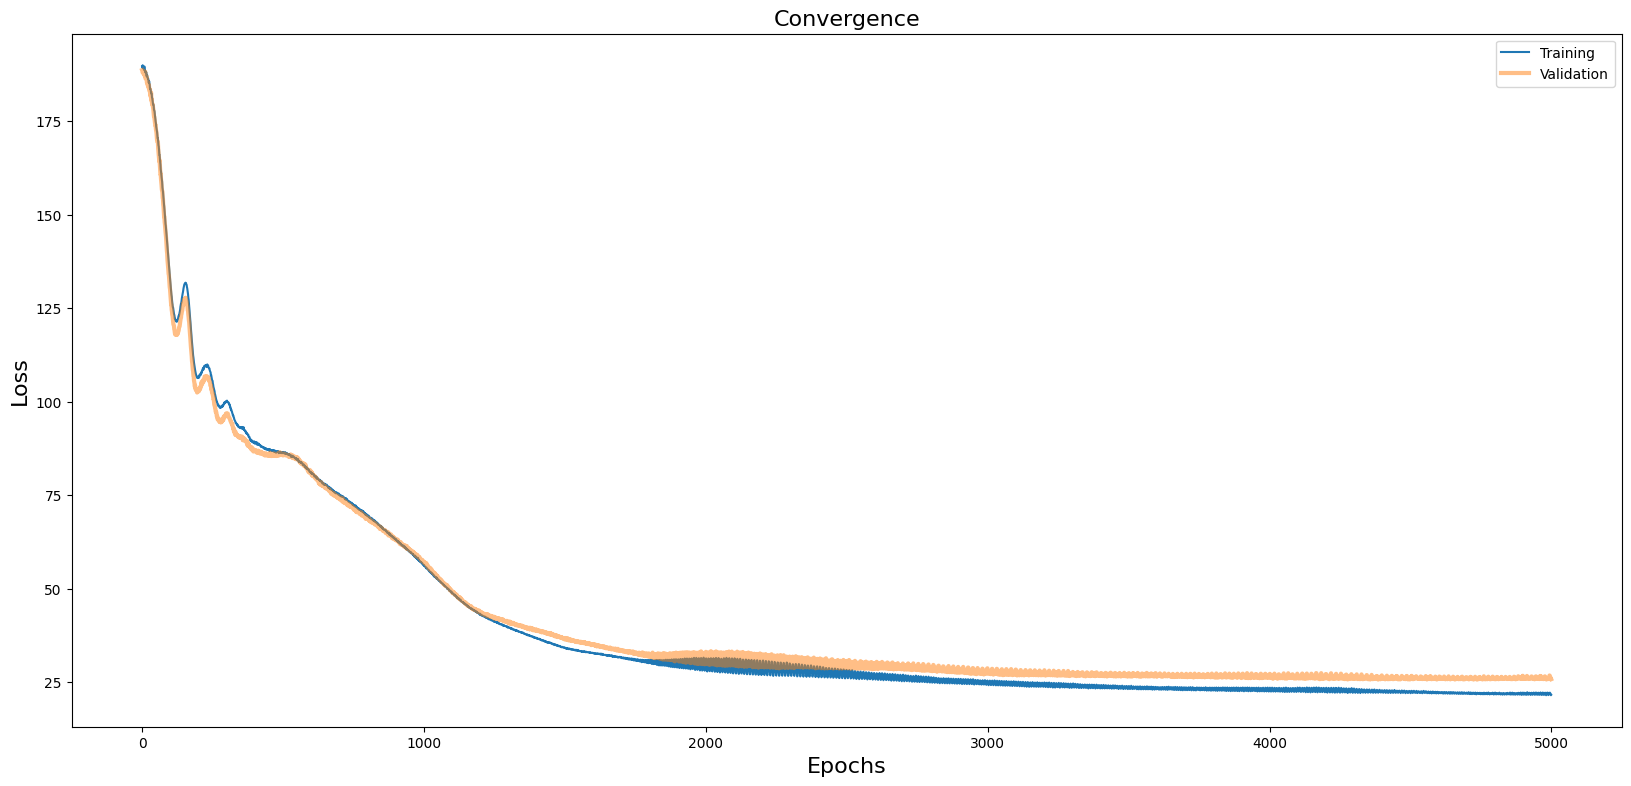

In [ ]:
plt.figure(figsize=(20, 9))
plt.plot(training_loss, label='Training')
plt.plot(validation_loss, label='Validation', linewidth=3, alpha=0.5)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Convergence', fontsize=16)
plt.legend()
plt.show()